In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_train = pd.read_csv('train.csv') 
df_test = pd.read_csv("test.csv")
# df.head() 
# df.shape 
# train_df.info()


In [32]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

features = ['OverallQual', 'GrLivArea', 'GarageCars']
# Scaled the features using Standardization
df_train_scaled = (df_train[features] - df_train[features].mean()) / df_train[features].std()

# Use the scaled features for training
x = np.c_[np.ones(df_train_scaled.shape[0]), df_train_scaled]

# Scaled the features using Standardization
df_test_scaled = (df_test[features] - df_train[features].mean()) / df_train[features].std()

# Use the scaled features for testing
X_test = np.c_[np.ones(df_test_scaled.shape[0]), df_test_scaled]
y_test = df_test['SalePrice']

In [33]:
# Defining loss function for linear regression
def Mean_Squared_Error(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [34]:
# Defining a simple linear regression class with gradient descent for training. 
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):  

    self._W = np.zeros(X.shape[1])

    self._cost_history = []
    self._accuracy_history = []
    self._w_history = [self._W]

    for i in range(n_iter):
      
        prediction = self.predict(X)
        cost = Mean_Squared_Error(prediction, y)
        # Calculate accuracy
        accuracy = 1 - cost / np.var(y)
        self._accuracy_history.append(accuracy)

        self._cost_history.append(cost)
        # Print the training accuracy for each epoch
        print(f"Epoch {i + 1}/{n_iter} - Training Accuracy: {accuracy:.4f}")
        
        self._gradient_descent_step(X, y, lr)
        
        self._w_history.append(self._W.copy())
    # Plot the cost after each epoch
    plt.plot(range(1, n_iter + 1), self._cost_history, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost over Epochs')
    plt.show()


    return self

Epoch 1/1000 - Training Accuracy: -2.0755
Epoch 2/1000 - Training Accuracy: -2.0091
Epoch 3/1000 - Training Accuracy: -1.9443
Epoch 4/1000 - Training Accuracy: -1.8811
Epoch 5/1000 - Training Accuracy: -1.8195
Epoch 6/1000 - Training Accuracy: -1.7594
Epoch 7/1000 - Training Accuracy: -1.7008
Epoch 8/1000 - Training Accuracy: -1.6436
Epoch 9/1000 - Training Accuracy: -1.5879
Epoch 10/1000 - Training Accuracy: -1.5335
Epoch 11/1000 - Training Accuracy: -1.4804
Epoch 12/1000 - Training Accuracy: -1.4285
Epoch 13/1000 - Training Accuracy: -1.3780
Epoch 14/1000 - Training Accuracy: -1.3286
Epoch 15/1000 - Training Accuracy: -1.2805
Epoch 16/1000 - Training Accuracy: -1.2334
Epoch 17/1000 - Training Accuracy: -1.1875
Epoch 18/1000 - Training Accuracy: -1.1427
Epoch 19/1000 - Training Accuracy: -1.0990
Epoch 20/1000 - Training Accuracy: -1.0562
Epoch 21/1000 - Training Accuracy: -1.0145
Epoch 22/1000 - Training Accuracy: -0.9738
Epoch 23/1000 - Training Accuracy: -0.9340
Epoch 24/1000 - Trai

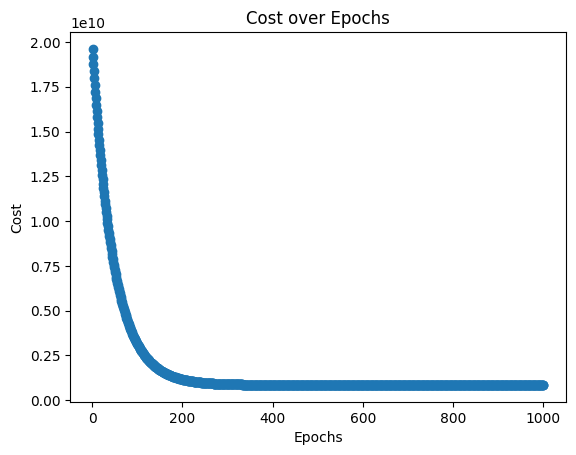

In [35]:
clf = LinearRegression()
clf.fit(x, y, n_iter=1000, lr=0.01)

In [36]:
clf._W  

array([181215.76796108,  36695.67856232,  26494.28064973,  16740.86022043])

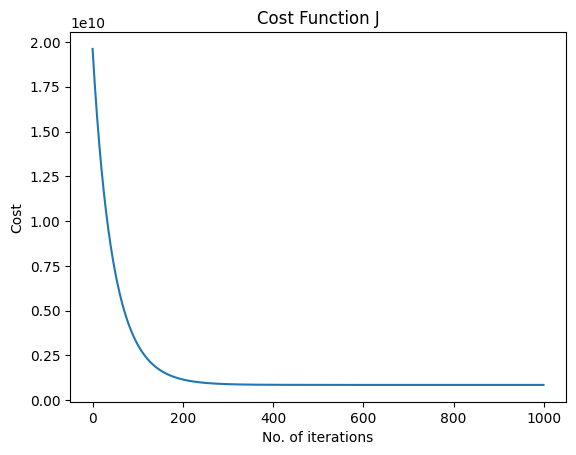

In [37]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [38]:
clf._cost_history[-1]

855762956.9013819

In [39]:
# Calculate Mean Squared Error
prediction = clf.predict(X_test)
mse=Mean_Squared_Error(prediction, y_test)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 692962641.05


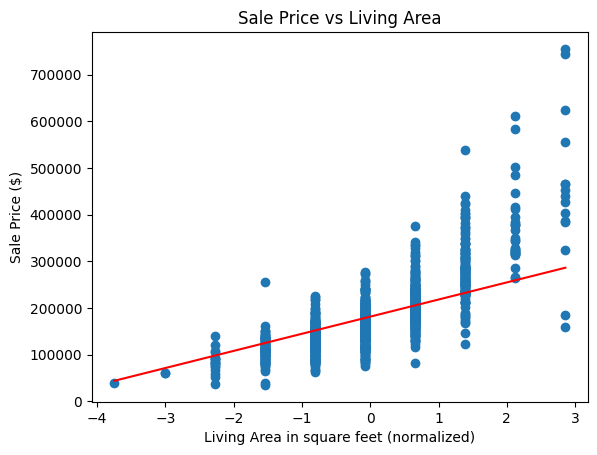

In [40]:
# Set up the plot
fig, ax = plt.subplots()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalized)')
plt.ylabel('Sale Price ($)')

# Scatter plot of the original data
ax.scatter(x[:, 1], y, label='Original Data')

# Plot the linear regression line
x_range = np.linspace(min(x[:, 1]), max(x[:, 1]), 100)
x_range_extended = np.c_[np.ones(x_range.shape[0]), x_range]  # Add a column of ones for bias
y_pred = np.dot(x_range_extended, clf._W[:2])
ax.plot(x_range, y_pred, color='red', label='Linear Regression Line')

plt.show()
